In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS


In [4]:
df=pd.read_csv('Hotel_Reviews.csv') #Reading Dataset

In [5]:
df.head() #display first 5 rows of Dataset

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
df.sample(8) #Display sample 8 rows of dataframe

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
508895,Whitcomb Street Trafalgar Square Westminster B...,266,3/11/2016,8.4,Thistle Trafalgar Square The Royal Trafalgar,Poland,breakfast not included in the price of the ro...,13,1193,the bathroom was great the view the location ...,14,20,9.2,"[' Leisure trip ', ' Group ', ' Executive Twin...",510 day,51.509133,-0.130189
316048,Eerste Constantijn Huygensstraat 10A Oud West ...,218,8/14/2015,7.5,Grand Hotel Downtown,United Arab Emirates,Bed,2,1270,No Positive,0,3,8.8,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",720 day,52.365130,4.872942
345521,Holland Park Avenue Kensington and Chelsea Lon...,843,8/14/2016,7.8,Hilton London Kensington Hotel,United Kingdom,No Negative,0,3801,The bed was extra comfortable The staffs were...,12,3,9.2,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",354 day,51.505108,-0.213266
306156,Dam 9 Amsterdam City Center 1012 JS Amsterdam ...,765,5/5/2016,8.4,NH Collection Amsterdam Grand Hotel Krasnapolsky,Russia,even thou the stuff was the best i ever met i...,48,4686,Location is perfect on dam square You are jus...,131,12,9.2,"[' Leisure trip ', ' Family with older childre...",455 day,52.372707,4.894366
169971,39 40 Cleveland Square Westminster Borough Lon...,153,12/28/2016,8.2,The Cleveland,Singapore,No Negative,0,909,the bed is very comfortable and the kitchen b...,12,12,9.2,"[' Leisure trip ', ' Family with young childre...",218 day,51.513969,-0.182820
158529,35 Charles Street Mayfair Westminster Borough ...,252,11/7/2016,9.1,The Chesterfield Mayfair,South Africa,the lift elevator is a disaster it is simply ...,35,1166,The staff were very helpful,7,5,5.0,"[' Leisure trip ', ' Solo traveler ', ' Classi...",269 day,51.507690,-0.147136
376630,Margareteng rtel 142 05 Margareten 1050 Vienna...,84,9/8/2015,8.9,Falkensteiner Hotel Wien Margareten,Taiwan,wifi need to register it s not convenient,10,1218,quite spacious and clean room near MRT privat...,22,10,9.6,"[' Leisure trip ', ' Couple ', ' Comfort Doubl...",695 day,48.186811,16.344016
507864,Westminster Bridge Road Lambeth London SE1 7UT...,2623,12/13/2015,8.7,Park Plaza Westminster Bridge London,United Kingdom,Poor quality breakfast particularly for the c...,15,12158,Good clean hotel close to central London Comf...,10,1,7.1,"[' Business trip ', ' Couple ', ' Superior Dou...",599 day,51.500961,-0.116591


In [7]:
df.shape #give rows and columns


(515738, 17)

In [6]:
df.info() #summary of DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [8]:
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
df.isnull().sum() #Finds missing values 


Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [9]:
df['Hotel_Address'].nunique() #finds unique values in Hotel_Address column

1493

<Axes: xlabel='Average_Score', ylabel='count'>

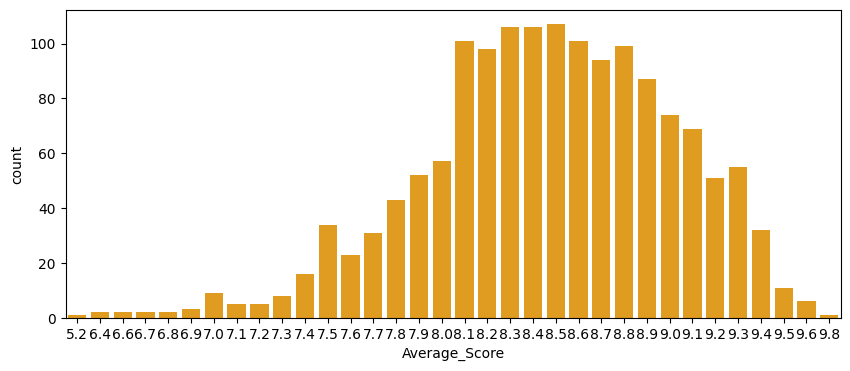

In [8]:
df_sd = df[['Hotel_Name','Average_Score']].drop_duplicates() #creating new dataframe sd with 2 columns without duplicates 
plt.figure(figsize = (10,4)) #graph
sns.countplot(x = 'Average_Score',data = df_sd,color = 'orange')#graph

In [11]:

df.Average_Score.describe() #computes some basic statistics o the Average_Score column of df, such as mean, standard deviation, minimum, maximum, quartiles, and count.




count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

In [12]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')#replace United Kingdom with UK
df['Country'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])#new column named country It uses a lambda function to split each value by space and take the last word

<Axes: title={'center': 'Most Hotels in Europe By Countries'}, ylabel='Country'>

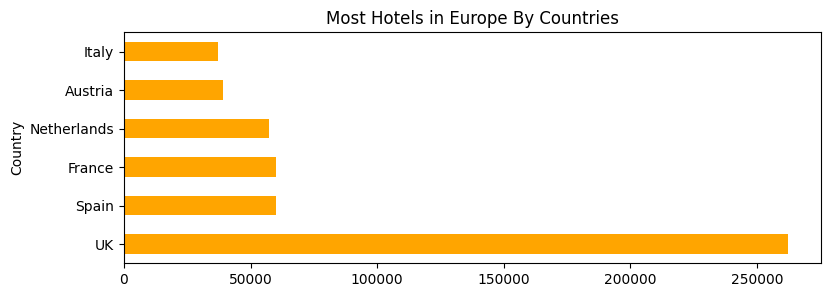

In [13]:
plt.figure(figsize = (9,3))#graph
plt.title('Most Hotels in Europe By Countries')#graph
df.Country.value_counts().plot.barh(color = 'orange')#graph

In [14]:
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:15] #give 15 entries for avg rating above 8.8

,Hotel_Name,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
327773,Ayre Hotel Gran V a,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,8.8,4324
361190,Hilton London Wembley,8.8,4305
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192


In [15]:
df['Positive_Review'] #give only positive reviews


0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4           Amazing location and building Romantic setting 
                                ...                        
515733                                             location
515734        Breakfast was ok and we got earlier check in 
515735                                          No Positive
515736     The rooms are enormous and really comfortable...
515737                                 staff was very kind 
Name: Positive_Review, Length: 515738, dtype: object

In [16]:
import nltk #natural language processing toolkit
from nltk import FreqDist # used to create  frequency distribution of words in text
import re #regular expressions
import spacy # provides various models and methods for analyzing and processing text data, such as tokenization, lemmatization, tagging, parsing, named entity recognition, and more.

In [17]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

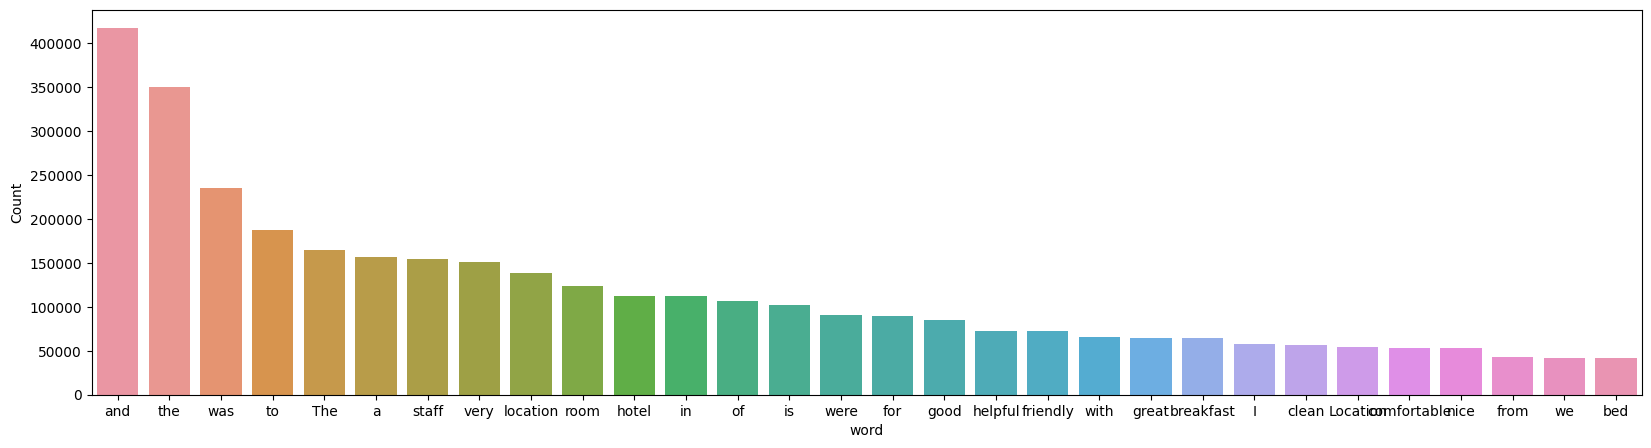

In [18]:
freq_words(df['Positive_Review']) #freq words in positive reviews 

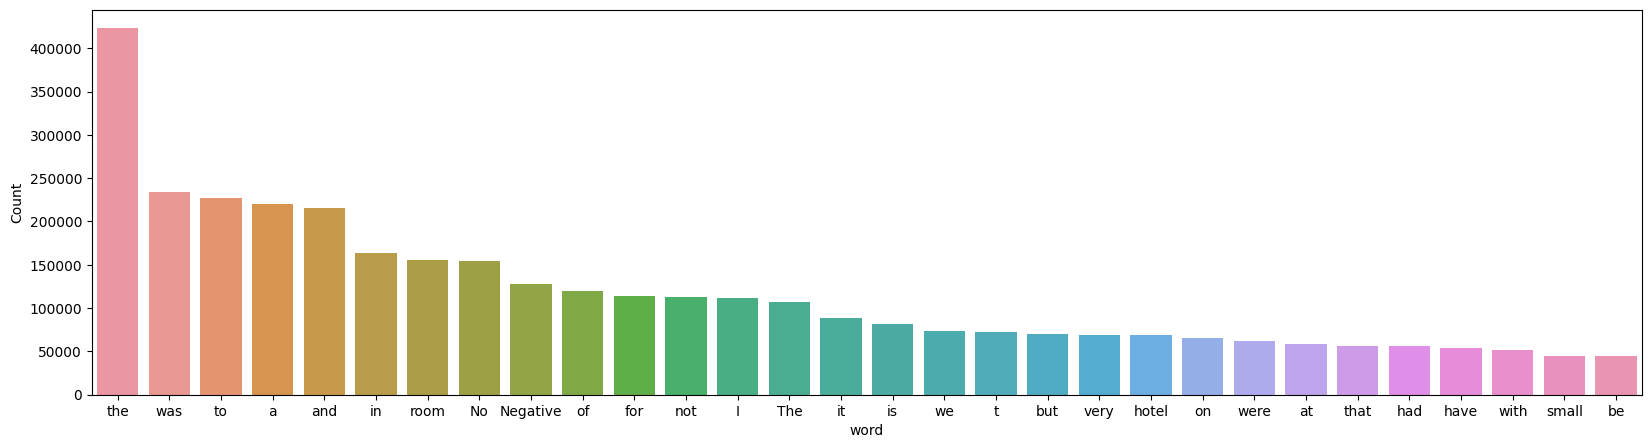

In [19]:
freq_words(df['Negative_Review'])#freq words in negative reviews

In [20]:
#replace special charecters with empty string in pos and neg reviews
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ") 
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

In [21]:
#Removing stopwoords from dataset reviews 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


# remove stopwords from the text
reviews_1 = [remove_stopwords(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_stopwords(r.split()) for r in df['Negative_Review']]





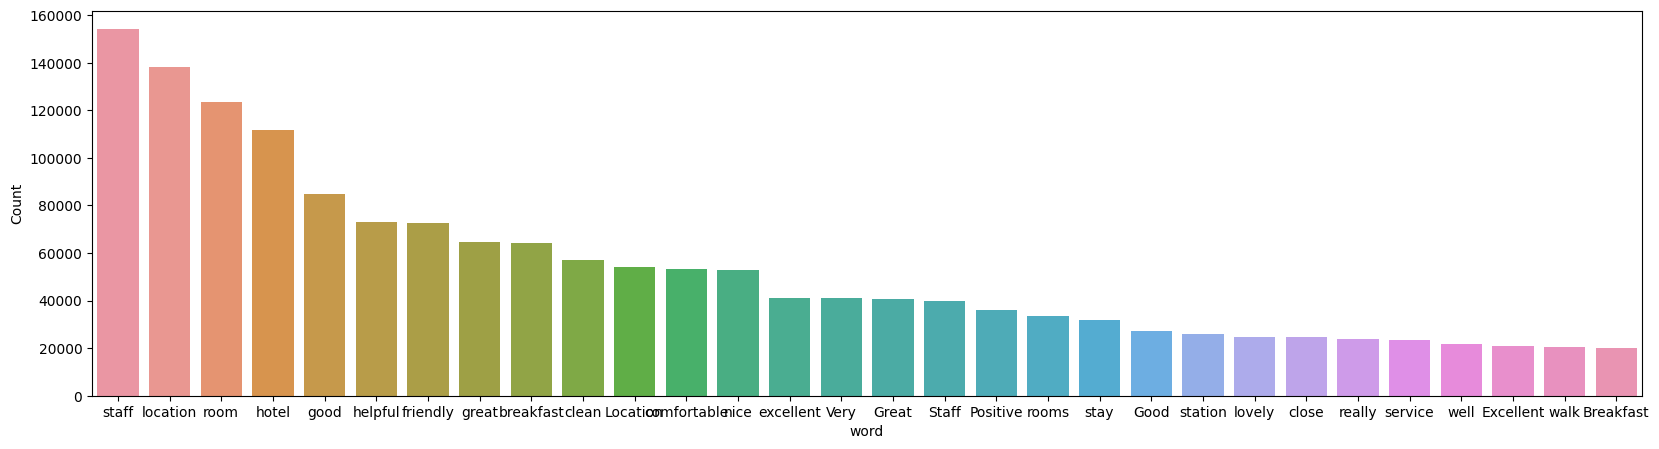

In [22]:
freq_words(reviews_1, 30)


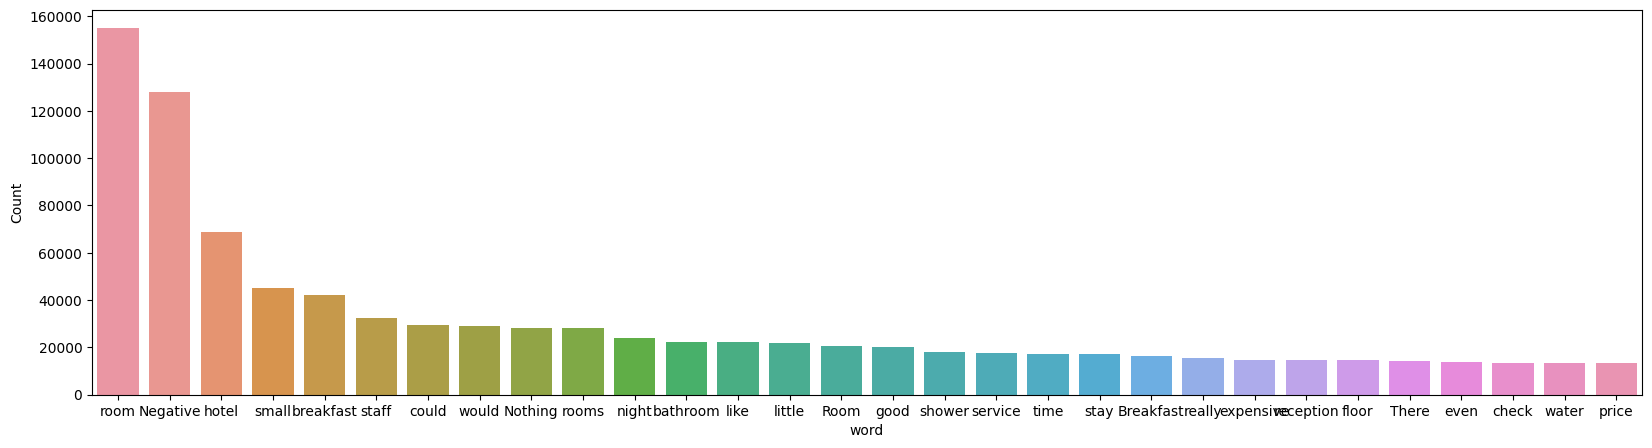

In [23]:
freq_words(reviews_2, 30)
           

Positive reviews


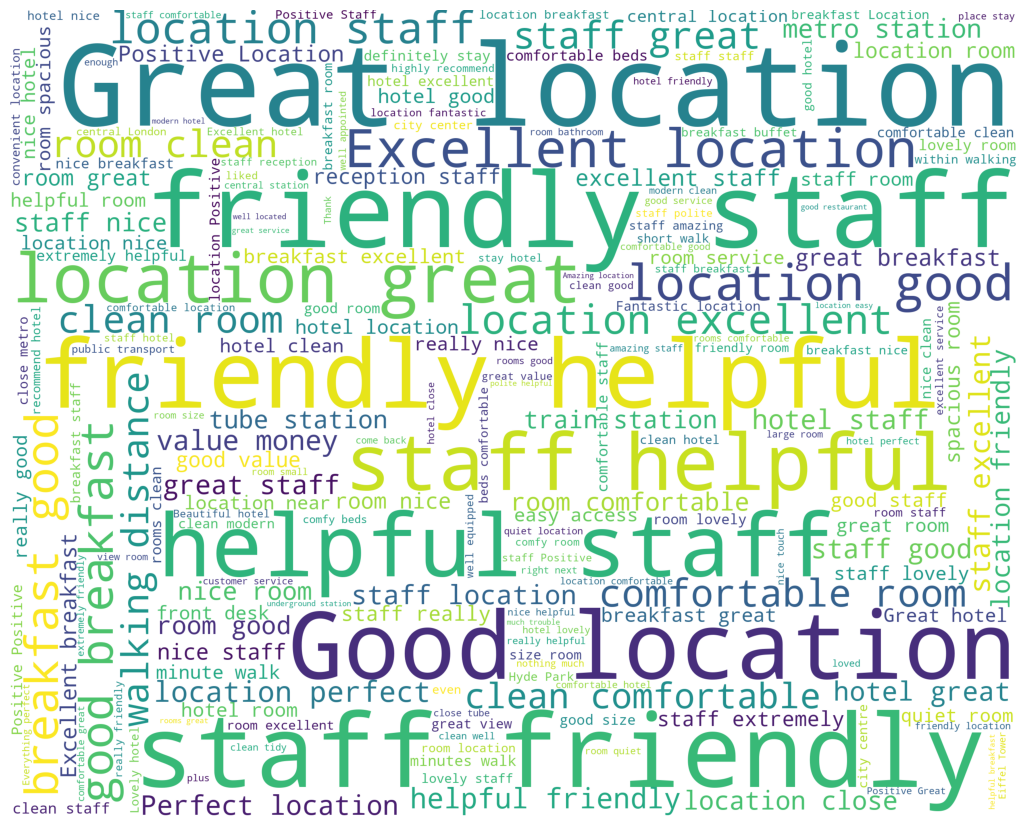

Negative reviews


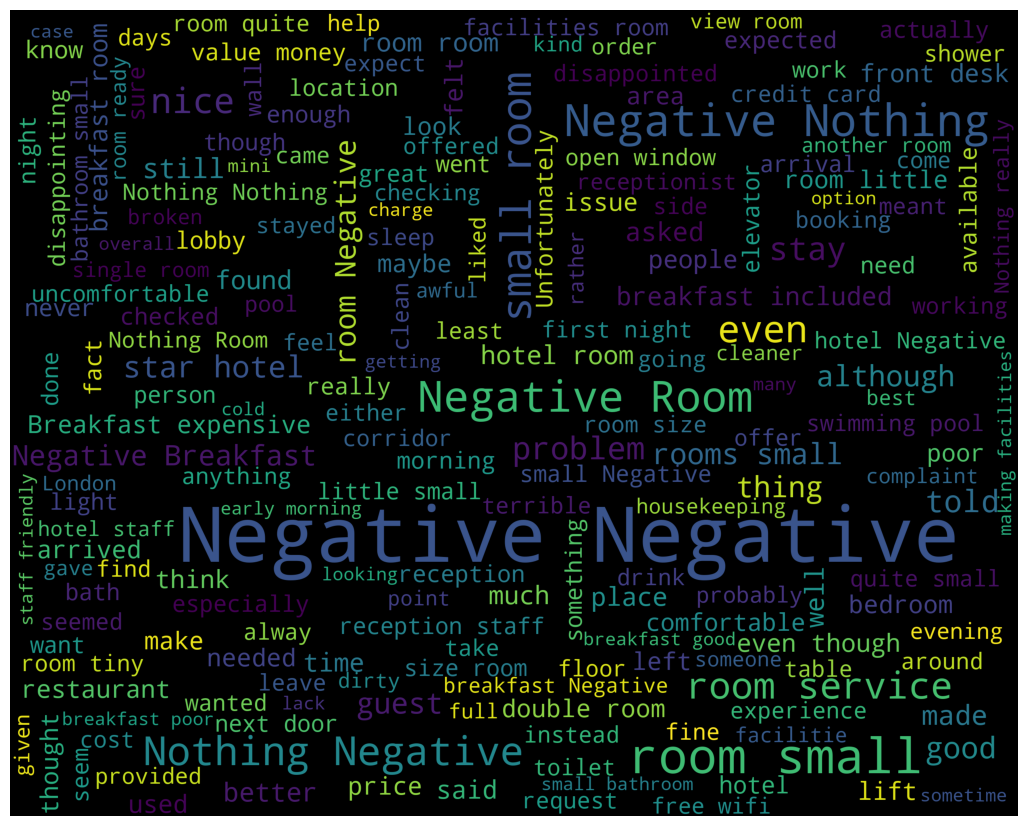

In [24]:
#Wordcloud for freq words in neg and pos reviews 
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive reviews")
wordcloud_draw(reviews_1,'white')
print("Negative reviews")
wordcloud_draw(reviews_2)


In [12]:
#taking entery of country name
def hotels_country(country_name):
  
  # Importing the data
  df = pd.read_csv("Hotel_Reviews.csv")

  # Get the hotels in the specified country.
  filter_countryname = df[df.Hotel_Address.str.contains(country_name)]
  
  # Remove duplicates from data
  remove_duplicate = filter_countryname.drop_duplicates(subset='Hotel_Address')
  # Sorting the hotels by average score.
  final_list_based_on_score = remove_duplicate[['Hotel_Address', 'Average_Score']].sort_values(by='Average_Score', ascending=False)

  def print_with_scroll(df):
    max_rows = 10
    i = 0
    print("The top 10 hotels in {} with the highest average score are:".format(country_name))
    print("Hotel Address                        | Average Score")
    for row in df.iterrows():
      if i == max_rows:
        print("Press enter to scroll down")
        input()
        i = 0
      print(row[1][0]," | ", row[1][1])
      i = i + 1

  print_with_scroll(final_list_based_on_score)

  return final_list_based_on_score


if __name__ == "__main__":
  country_name = input("Enter a country name: ")
  top_hotels = hotels_country(country_name)


Enter a country name:  France


The top 10 hotels in France with the highest average score are:
Hotel Address                        | Average Score
15 Place Vend me 1st arr 75001 Paris France  |  9.8
4 rue d Alger 1st arr 75001 Paris France  |  9.6
19 Boulevard De La Tour Maubourg 7th arr 75007 Paris France  |  9.5
19 avenue Kleber 16th arr 75116 Paris France  |  9.5
16 Avenue de l Opera 1st arr 75001 Paris France  |  9.4
33 Rue Dauphine 6th arr 75006 Paris France  |  9.4
78 Rue Blomet 15th arr 75015 Paris France  |  9.4
18 Rue du Cirque 8th arr 75008 Paris France  |  9.4
55 rue Monge 5th arr 75005 Paris France  |  9.4
7 Boulevard Bourdon 4th arr 75004 Paris France  |  9.4
Press enter to scroll down


85 87 RUE DES ARCHIVES 3rd arr 75003 Paris France  |  9.4
31 Avenue George V 8th arr 75008 Paris France  |  9.3
10 rue de Bruxelles 9th arr 75009 Paris France  |  9.3
31 rue de la Folie M ricourt 11th arr 75011 Paris France  |  9.3
9 Carrefour de l Od on 6th arr 75006 Paris France  |  9.3
36 Rue Saint Marc 2nd arr 75002 Paris France  |  9.3
37 Avenue Hoche 8th arr 75008 Paris France  |  9.3
15 Rue Jacob 6th arr 75006 Paris France  |  9.3
45 Rue des Acacias 17th arr 75017 Paris France  |  9.3
123 boulevard S bastopol 2nd arr 75002 Paris France  |  9.3
Press enter to scroll down


KeyboardInterrupt: Interrupted by user

1492